# Public Sentiment Analysis using Social Media

The Web is a huge virtual space where to express and share individual opinions, influencing any aspect of life, with implications for marketing and communication alike. Social Media are influencing consumers' preferences by shaping their attitudes and behaviors. Monitoring the Social Media activities is a good way to measure customers' loyalty, keeping a track on their sentiment towards brands or products. Social Media are the next logical marketing arena.  

Sentiment Analysis on Social Media (PDF Download Available). Available from: https://www.researchgate.net/publication/230758119_Sentiment_Analysis_on_Social_Media 

In [28]:
from IPython.display import Image
from IPython.core.display import HTML 
print "\t\tTypical Description of marketing using sentiment analysis\n"
Image(url= "sent1.png")


		Typical Description of marketing using sentiment analysis



In [29]:
print "\t\tSentiment Analysis Best Practices:\n\n"
Image(url= "sent2.png")

		Sentiment Analysis Best Practices:




#### Types of sentiment analysis:

   * Tweets
   * Facebook/Instagram Posts
   * Comments
   * Blogs
   * Product Reviews / Customer Reviews
   * News Articles
    

<font size=3>**In this part of the project** we will be doing the sentiment analysis on the user's post for the __Instagram__ data<br>we will start off by importing the useful dependencies
</font>

In [30]:
from AccessToken import APP_ACCESS_TOKEN, BASE_URL
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
import requests
import urllib

<font size=3>Now before starting interacting with the instagram api,we first need to make a instagram developer account on <a href="https://www.instagram.com/developer/">here</a> , after registering we get a __App Access token__ this will be useful to interact with the instagram api,after having the key we are ready to go<br><br>Now to interact with the Instagram endpoints <a href="https://www.instagram.com/developer/endpoints/">(here)</a> 
    
openup the documentation to get the interating url
 </font>



<font size=3>
The first method we write is to get the self information<br><br>For Example<br><br>
<p style="text-align:center;">This is the type of response that is recieved when interacting with the Api</p>    <img src="self_info1.png" alt="Girl in a jacket">
</font>


<font size=3>
Below are a few methods to get 
  <ul>
  <li>Self Information</li>
  <li>User ID</li>
  <li>User Info</li>
 
</ul>  
<font>

In [31]:
# method for getting self information using requests
def self_info():
    request_url = (BASE_URL + '/users/self/?access_token=%s') % APP_ACCESS_TOKEN
    print 'Requesting info for: '+request_url
    # the reply from the api is in json format
    my_info = requests.get(request_url).json()
    if my_info['meta']['code'] == 200:
        if len(my_info['data']):
            print 'Username : %s'% (my_info['data']['username'])
            print 'No. of followers : %s'% (my_info['data']['counts']['followed_by'])
            print '# people you are following: %s'% (my_info['data']['counts']['follows'])
            print 'No. of posts: %s'% (my_info['data']['counts']['media'])
        else:
            print 'No such user exists'
    else:
        print 'Error occurred'

In [32]:
self_info()

Requesting info for: https://api.instagram.com/v1/users/self/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
Username : aanubhavanand
No. of followers : 0
# people you are following: 137
No. of posts: 0


In [33]:
# method to get userid by a username
def get_user_id(insta_username):
    request_url = (BASE_URL + '/users/search?q=%s&access_token=%s') % (insta_username, APP_ACCESS_TOKEN)
    print 'GET request url for user id : %s' % request_url
    user_info = requests.get(request_url).json()

    if user_info['meta']['code'] == 200:
        if len(user_info['data']):
            return user_info['data'][0]['id']
        else:
            return None
    else:
        print 'Status code other than 200 received!'
        exit()

In [34]:
get_user_id('aanubhavanand')

GET request url for user id : https://api.instagram.com/v1/users/search?q=aanubhavanand&access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764


u'1777079232'

In [35]:
# method for user information from id retrieved by get_user_id()
def get_user_info(insta_username):
    user_id = get_user_id(insta_username)
    if user_id == None:
        print 'User does not exist!'
        exit()
    request_url = (BASE_URL + '/users/%s?access_token=%s') % (user_id, APP_ACCESS_TOKEN)
    print 'GET request url : %s' % request_url
    user_info = requests.get(request_url).json()

    if user_info['meta']['code'] == 200:
        if len(user_info['data']):
            print 'Username: %s' % (user_info['data']['username'])
            print 'No. of followers: %s' % (user_info['data']['counts']['followed_by'])
            print 'No. of people you are following: %s' % (user_info['data']['counts']['follows'])
            print 'No. of posts: %s' % (user_info['data']['counts']['media'])
        else:
            print 'There is no data for this user!'
    else:
        print 'Status code other than 200 received!'
        


In [36]:
get_user_info('aanubhavanand')

GET request url for user id : https://api.instagram.com/v1/users/search?q=aanubhavanand&access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
GET request url : https://api.instagram.com/v1/users/1777079232?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
Username: aanubhavanand
No. of followers: 0
No. of people you are following: 137
No. of posts: 0


In [37]:
# method for self recent posts
def get_own_post():
    request_url = (BASE_URL + '/users/self/media/recent/?access_token=%s') % (APP_ACCESS_TOKEN)
    print 'GET request url for own post : %s' % request_url
    own_media = requests.get(request_url).json()

    if own_media['meta']['code'] == 200:
        if len(own_media['data']):
            choose_post(own_media)
            print 'Your post has been downloaded!'
        else:
            print 'Post does not exist!'
    else:
        print 'Status code other than 200 received!'

In [38]:
get_own_post()

GET request url for own post : https://api.instagram.com/v1/users/self/media/recent/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
Post does not exist!


In [48]:
# method for downloading user's recent media posts
def get_user_post(insta_username):
    user_id = get_user_id(insta_username)
    if user_id == None:
        print 'User does not exist!'
        exit()
    request_url = (BASE_URL + '/users/%s/media/recent/?access_token=%s') % (user_id, APP_ACCESS_TOKEN)
    print 'GET request url for user post : %s' % request_url
    user_media = requests.get(request_url).json()

    if user_media['meta']['code'] == 200:
        if len(user_media['data']):
            name = choose_post(user_media)
            print 'Your post has been downloaded!'
            print 'http://localhost:8888/notebooks/'+name
        else:
            print 'Post does not exist!'
    else:
        print 'Status code other than 200 received!'

In [51]:
get_user_post('forinstaprojects')

GET request url for user id : https://api.instagram.com/v1/users/search?q=forinstaprojects&access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
GET request url for user post : https://api.instagram.com/v1/users/5633959407/media/recent/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
1. Select Recent Image
2. Select Least liked post
3. Select Recent video 
enter the choice of post : 3
Your post has been downloaded!
http://localhost:8888/notebooks/1544709421665646253_5633959407.mp4


In [50]:
# method to select post according to user's choice
def choose_post(user_media):
    print '1. Select Recent Image\n2. Select Least liked post\n3. Select Recent video '
    select = int(raw_input("enter the choice of post : "))
    if select == 1:
        i = -1
        for media in user_media['data']:
            i = i+1
            if media['type'] == 'image':
                image_name = user_media['data'][i]['id'] + '.jpeg'
                image_url = user_media['data'][i]['images']['standard_resolution']['url']
                urllib.urlretrieve(image_url, image_name)
                return image_name
                break
    elif select == 2:
        lowest = user_media['data'][0]['likes']['count']
        i=-1
        for media in user_media['data']:
            i = i+1
            if media['likes']['count'] < lowest:
                lowest = media['likes']['count']
                index = i
        if user_media['data'][index]['type'] == 'image':
            image_name = "least_liked.jpg"
            image_url = user_media['data'][index]['images']['standard_resolution']['url']
            urllib.urlretrieve(image_url, image_name)
            return image_name
        elif user_media['data'][index]['type'] == 'video':
            video_name = "least_liked_video.mp4"
            video_url = user_media['data'][index]['videos']['standard_resolution']['url']
            urllib.urlretrieve(video_url, video_name)
            return video_name
    elif select == 3:
        i=-1
        vid_index = -1
        for media in user_media['data']:
            i = i+1
            if media['type'] == 'video':
                vid_index = i
        if vid_index == -1:
            print "no videos found"
            exit()
        video_name = user_media['data'][vid_index]['id']+'.mp4'
        video_url = user_media['data'][vid_index]['videos']['standard_resolution']['url']
        urllib.urlretrieve(video_url, video_name)
        return video_name

In [55]:
# method to get id of a recent post by user
def get_post_id(insta_username):
    user_id = get_user_id(insta_username)
    if user_id == None:
        print 'User does not exist!'
        exit()
    request_url = (BASE_URL + '/users/%s/media/recent/?access_token=%s') % (user_id, APP_ACCESS_TOKEN)
    print 'GET request url for recent post : %s' % request_url
    user_media = requests.get(request_url).json()

    if user_media['meta']['code'] == 200:
        if len(user_media['data']):
            return user_media['data'][0]['id']
        else:
            print 'There is no recent post of the user!'
            exit()
    else:
        print 'Status code other than 200 received!'
        exit()

<font size = 3>
Below is the code to like a recent post on any user.
</font>

In [ ]:
# method to like the post of user by getting it's post id
def like_a_post(insta_username):
    media_id = get_post_id(insta_username)
    request_url = (BASE_URL + '/media/%s/likes') % media_id
    payload = {"access_token": APP_ACCESS_TOKEN}
    print 'POST request url to like : %s' % request_url
    post_a_like = requests.post(request_url, payload).json()
    if post_a_like['meta']['code'] == 200:
        print 'Like was successful!'
    else:
        print 'Your like was unsuccessful. Try again!'

In [ ]:
# method to get list of people liking the recent media for a user
def get_like_list(insta_username):
    media_id = get_post_id(insta_username)
    request_url = (BASE_URL + '/media/%s/likes?access_token=%s') % (media_id, APP_ACCESS_TOKEN)
    print 'GET Liked media url : %s' % request_url
    liked_list = requests.get(request_url).json()
    if(liked_list['meta']['code']) == 200:
        if len(liked_list['data']):
            print 'people who liked it :'
            for people in liked_list['data']:
                print people['username']
            print 'Number of likes : %d' % len(liked_list['data'])
        else:
            print "no likes on the post"
    else:
        print 'some error occurred'

In [69]:
# method to put a comment on the post of a user with help of post id
def post_a_comment(insta_username):
    media_id = get_post_id(insta_username)
    comment_text = raw_input("Your comment: ")
    payload = {"access_token": APP_ACCESS_TOKEN, "text" : comment_text}
    request_url = (BASE_URL + '/media/%s/comments') % media_id
    print 'POST url for commenting post: %s' % request_url

    make_comment = requests.post(request_url, payload).json()

    if make_comment['meta']['code'] == 200:
        print "Successfully added a new comment!"
    else:
        print "Unable to add comment. Try again!"

In [72]:
post_a_comment('forinstaproject')

GET request url for user id : https://api.instagram.com/v1/users/search?q=forinstaproject&access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
GET request url for recent post : https://api.instagram.com/v1/users/5633959407/media/recent/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
Your comment: damn Nico, he is a failure
POST url for commenting post: https://api.instagram.com/v1/media/1544709421665646253_5633959407/comments
Successfully added a new comment!


In [ ]:
def get_comment_list(insta_username):
    media_id = get_post_id(insta_username)
    request_url = BASE_URL + '/media/%s/comments?access_token=%s' % (media_id, APP_ACCESS_TOKEN)
    print "GET url for Comments list : %s" % request_url
    print '\n'
    comment_list = requests.get(request_url).json()
    if(comment_list['meta']['code']) == 200:
        if len(comment_list['data']):
            for comments in comment_list['data']:
                print comments["from"]["username"]+'  says : '+comments["text"]
                # print comments["text"]

In [ ]:
# method to get recent media liked by self
def get_recent_liked():
    request_url = BASE_URL+'/users/self/media/liked?access_token=%s' % APP_ACCESS_TOKEN
    print "Get url for recent likes : %s" % request_url
    liked_list = requests.get(request_url).json()
    if liked_list['meta']['code'] == 200:
        for media in liked_list['data']:
            print "liked for user    %s:" % media['user']['username']
            #print media['user']['username']
            print "type : %s" % media['type']
            if media['tags'] and media['caption']:
                print "tags : %s  , caption : %s" % (media['tags'][0], media['caption']['text'])
            print "\n"

<font size=3>
The following code uses the <font color = red><a href="https://textblob.readthedocs.io/en/dev/">Text Blob</a></font> <font color = red>Library</font>
to analyse the text comments.<br>
It scores the sentences in the text for how much postive or negative the text on level of 0 to 1.<br><br>
    
Next we plot a pie chart for negative vs positive comments using <a href="https://matplotlib.org/contents.html">Matplotlib</a> Library.

</font>

In [65]:
# method to analyze comments
def analyze_comment(insta_username):
    negative = []
    positive = []
    media_id = get_post_id(insta_username)
    request_url = (BASE_URL + '/media/%s/comments/?access_token=%s') % (media_id, APP_ACCESS_TOKEN)
    print 'GET request url : %s' % request_url
    comment_info = requests.get(request_url).json()
    if comment_info['meta']['code'] == 200:
        if len(comment_info['data']):
            print "analyzing ...."
            for x in range(0, len(comment_info['data'])):
                # comment_id = comment_info['data'][x]['id']
                comment_text = comment_info['data'][x]['text']
                
                blob = TextBlob(comment_text, analyzer=NaiveBayesAnalyzer())
                
                if blob.sentiment.p_neg > 0.5:
                    negative.append(blob.sentiment.p_neg)
                if blob.sentiment.p_pos > 0.5:
                    positive.append(blob.sentiment.p_pos)
    slices = [len(negative), len(positive)]
    print "negative : %d" % len(negative)
    print "positive :%d" % len(positive)
    cols = ['y', 'r']
    activities = ['negative', 'positive']
    plt.pie(slices, startangle=90, shadow=True, explode=(0.1, 0), autopct='%1.1f%%', colors=cols, labels=activities)
    plt.show()

GET request url for user id : https://api.instagram.com/v1/users/search?q=forinstaprojects&access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
GET request url for recent post : https://api.instagram.com/v1/users/5633959407/media/recent/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
GET request url : https://api.instagram.com/v1/media/1544709421665646253_5633959407/comments/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
analyzing ....
negative : 2
positive :4


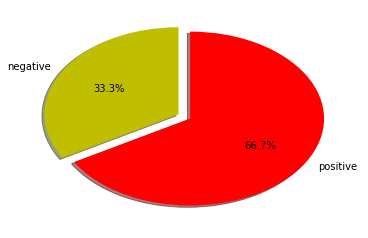

In [73]:
analyze_comment('forinstaprojects')

In [75]:
# method to delete negative comments
def delete_negative_comment(insta_username):
    media_id = get_post_id(insta_username)
    request_url = (BASE_URL + '/media/%s/comments/?access_token=%s') % (media_id, APP_ACCESS_TOKEN)
    print 'GET request url : %s' % request_url
    comment_info = requests.get(request_url).json()

    if comment_info['meta']['code'] == 200:
        if len(comment_info['data']):

            for x in range(0, len(comment_info['data'])):
                comment_id = comment_info['data'][x]['id']
                comment_text = comment_info['data'][x]['text']
                blob = TextBlob(comment_text, analyzer=NaiveBayesAnalyzer())
                if blob.sentiment.p_neg > blob.sentiment.p_pos:
                    print 'Negative comment : %s' % comment_text
                    delete_url = (BASE_URL + '/media/%s/comments/%s/?access_token=%s') % (media_id, comment_id, APP_ACCESS_TOKEN)
                    print 'DELETE request url : %s' % delete_url
                    delete_info = requests.delete(delete_url).json()

                    if delete_info['meta']['code'] == 200:
                        print 'Comment successfully deleted!\n'
                    else:
                        print 'Unable to delete comment!'
                else:
                    print 'Positive comment : %s\n' % comment_text
        else:
            print 'There are no existing comments on the post!'
    else:
        print 'Status code other than 200 received!'

In [76]:
delete_negative_comment('forinstaproject')

GET request url for user id : https://api.instagram.com/v1/users/search?q=forinstaproject&access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
GET request url for recent post : https://api.instagram.com/v1/users/5633959407/media/recent/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
GET request url : https://api.instagram.com/v1/media/1544709421665646253_5633959407/comments/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
Positive comment : thanks

Positive comment : good thank you

Negative comment : A very bad post
DELETE request url : https://api.instagram.com/v1/media/1544709421665646253_5633959407/comments/17895875494106601/?access_token=1777079232.3f4b954.a346d80dd2d94849981fff6218816764
Comment successfully deleted!

Positive comment : it's nice to see formula1 in azerbaijan

Positive comment : and lewis won the championship, cheers

Negative comment : damn Nico, he is a failure
DELETE request url : https://api.instagram.com/v1/medi

In [ ]:
# execution starts from here
def start_bot():
    while True:
        print '\n'
        print 'Hey! Welcome to instaBot!'
        print 'Here are your menu options:'
        print "a.Get your own details\n"
        print "b.Get details of a user by username\n"
        print "c.Get your own recent post\n"
        print "d.Get the recent post of a user by username\n"
        print "e.Get a list of people who have liked the recent post of a user\n"
        print "f.Like the recent post of a user\n"
        print "g.Get a list of comments on the recent post of a user\n"
        print "h.Make a comment on the recent post of a user\n"
        print "i.Delete negative comments from the recent post of a user\n"
        print "j.Get Recent Media liked by self\n"
        print "k.Analyze Recent Comment\n"
        print "l.Exit\n"

        choice = raw_input("Enter you choice: ")
        if choice == "a":
            self_info()
        elif choice == "b":
            insta_username = raw_input("Enter the username of the user: ")
            get_user_info(insta_username)
        elif choice == "c":
            get_own_post()
        elif choice == "d":
            insta_username = raw_input("Enter the username of the user: ")
            get_user_post(insta_username)
        elif choice == "e":
            insta_username = raw_input("Enter the username of the user: ")
            get_like_list(insta_username)
        elif choice == "f":
            insta_username = raw_input("Enter the username of the user: ")
            like_a_post(insta_username)
        elif choice == "g":
            insta_username = raw_input("Enter the username of the user: ")
            get_comment_list(insta_username)
        elif choice == "h":
            insta_username = raw_input("Enter the username of the user: ")
            post_a_comment(insta_username)
        elif choice == "i":
            insta_username = raw_input("Enter the username of the user: ")
            delete_negative_comment(insta_username)
        elif choice == "j":
            get_recent_liked()
        elif choice == "k":
            insta_username = raw_input("Enter the username of the user: ")
            analyze_comment(insta_username)
        elif choice == "l":
            exit()
        else:
            print "wrong choice"

In [ ]:
#start_bot()

In [ ]:
#1. Write code to compare negative and positive comments on a particular's posts and plot it on a pie chart.

#2. Write code to get images between certain geographical coordinates, analyse the caption and determine if
#                                            it is about a natural calamity such as earthquake, floods etc. 

#3. Write code to determine number of images shared with a particular hash tag and plot the same using malplotlib. 

#4. Write code to do targeted commented on posts for the sake of marketing your prouct or service (ex: coffee, shoes,
#                                                                                                      clothes)

#5. Write code to do find sub-trends for an event or activity and plot a word cloud for the same

#6. Write code to determine a user's interests based on hashtag analysis of recent posts and plot the same using 
#                                                                                                    matplotlib.




